# Face detection with ageitgey/face_recognition

https://github.com/ageitgey/face_recognition

In [1]:
! pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=0847ff241bdfa4014ac7819a0149d6bc3f98391880121cb0fb6c99be8e71d8bf
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import face_recognition
from PIL import Image

In [3]:
image = face_recognition.load_image_file("/content/original.jpg")
face_locations = face_recognition.face_locations(image)

In [4]:
top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]
pil_image = Image.fromarray(face_image)

In [5]:
pil_image.save('face.jpg')

# Intermediate activations of VGGFace2-ResNet50

https://github.com/WeidiXie/Keras-VGGFace2-ResNet50

*Visualizing intermediate activations consists of displaying the feature maps that are
output by various convolution and pooling layers in a network, given a certain input
(the output of a layer is often called its activation, the output of the activation function). This gives a view into how an input is decomposed into the different filters
learned by the network. You want to visualize feature maps with three dimensions:
width, height, and depth (channels). Each channel encodes relatively independent
features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.*

In [6]:
! unzip /content/drive/MyDrive/vggface2_Keras.zip

Archive:  /content/drive/MyDrive/vggface2_Keras.zip
   creating: vggface2_Keras/
  inflating: vggface2_Keras/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/vggface2_Keras/
  inflating: __MACOSX/vggface2_Keras/._.DS_Store  
   creating: vggface2_Keras/meta/
  inflating: vggface2_Keras/meta/.DS_Store  
   creating: __MACOSX/vggface2_Keras/meta/
  inflating: __MACOSX/vggface2_Keras/meta/._.DS_Store  
  inflating: vggface2_Keras/meta/ijbb_template_pair_label.txt  
  inflating: vggface2_Keras/meta/ijbb_face_tid_mid.txt  
  inflating: vggface2_Keras/README.md  
   creating: vggface2_Keras/model/
  inflating: vggface2_Keras/model/.DS_Store  
   creating: __MACOSX/vggface2_Keras/model/
  inflating: __MACOSX/vggface2_Keras/model/._.DS_Store  
   creating: vggface2_Keras/model/resnet50_softmax_dim512/
  inflating: vggface2_Keras/model/resnet50_softmax_dim512/weights.h5  
   creating: __MACOSX/vggface2_Keras/model/resnet50_softmax_dim512/
  inflating: __MACOSX/vggface2_Keras/model/resne

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [8]:
img_path = '/content/face.jpg'
img = load_img(img_path, target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

In [9]:
print(img_tensor.shape)

(1, 224, 224, 3)


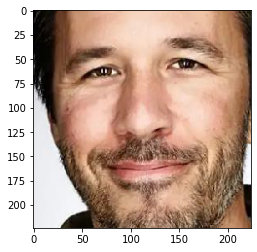

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [11]:
from keras import models

In [12]:
model = load_model('/content/vggface2_Keras/model/resnet50_softmax_dim512/weights.h5') 

ResNet50 architecture starts with a simple convolution operation, then there are convolution blocks afterwards.

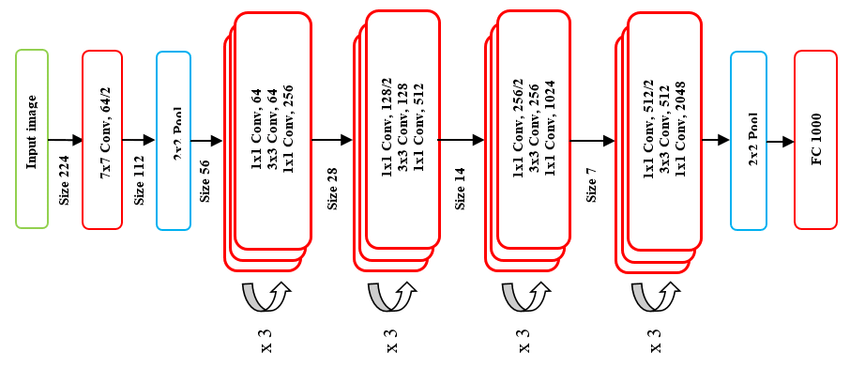

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 base_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['base_input[0][0]']             
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                           

In [15]:
len(model.layers)

177

In [16]:
first_conv_outputs = [layer.output for layer in model.layers[:5]] # 7x7 Conv
first_conv_activation_model = models.Model(inputs=model.input, outputs=first_conv_outputs)

In [17]:
first_conv_activations = first_conv_activation_model.predict(img_tensor)

In [18]:
len(first_conv_activations)

5

base_input, conv 2D, batch normalization, activation, max pooling 2d

In [28]:
firstconv_conv_activation = first_conv_activations[1]

In [29]:
firstconv_conv_activation.shape

(1, 112, 112, 64)

Convolution operation increased #channels to 64 and halved width & height 

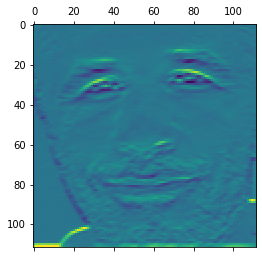

In [30]:
plt.matshow(firstconv_conv_activation[0, :, :, 16], cmap='viridis')

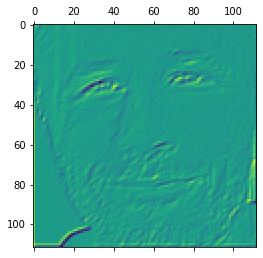

In [31]:
plt.matshow(firstconv_conv_activation[0, :, :, 32], cmap='viridis')

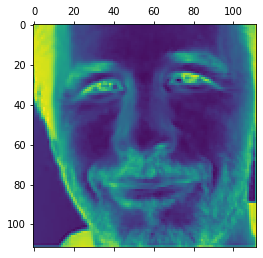

In [32]:
plt.matshow(firstconv_conv_activation[0, :, :, 63], cmap='viridis')

Each channel encodes some aspect of the visual data; edges, eyes and etc.

Let's observe the effects of max pooling

In [42]:
firstconv_maxpool_activation = first_conv_activations[4]
firstconv_maxpool_activation.shape

(1, 55, 55, 64)

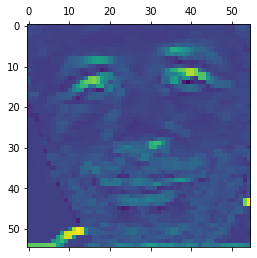

In [43]:
plt.matshow(firstconv_maxpool_activation[0, :, :, 16], cmap='viridis')

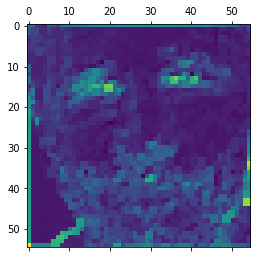

In [44]:
plt.matshow(firstconv_maxpool_activation[0, :, :, 32], cmap='viridis')

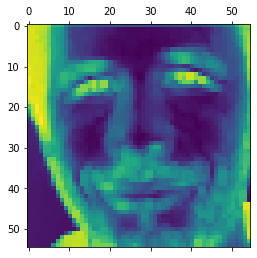

In [45]:
plt.matshow(firstconv_maxpool_activation[0, :, :, 63], cmap='viridis')